<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/cangokalp/EE-460J/blob/master/lab_1/lab_1.ipynb#scrollTo=04WVDXBKOy-b"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## EE460J-Lab 1 | September 2, 20
### Can Gokalp (cg39283) | Priyadarshan Patil (pp22352)

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

sns.set(style="white", color_codes=True)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Programming Questions

## Problem 1

In [11]:
g1 = np.random.normal(-10,5,1000)
g2 = np.random.normal(10,5,1000)

> a)

Text(0.5, 1.0, 'Histogram of sum of the two Gaussians')

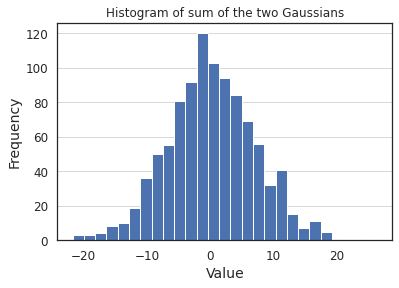

In [12]:
sum_g = g1 + g2
plt.hist(sum_g, bins='auto');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of sum of the two Gaussians')

Sum of two independent normally distributed random variables is again a normally distributed random variable, with $\mu = \mu_1 + \mu_2$ and $\sigma^2 = \sigma_1^2 + \sigma_2^2$ - which is observed in the bell shaped histogram centered around $\mu=0$.

> b)

In [14]:
est_mean = np.mean(sum_g)
est_variance = np.var(sum_g)
print('mean: {}, variance: {}'.format(est_mean, est_variance))

mean: 0.17450379502059815, variance: 47.84966344720487


## Problem 2

Text(0.5, 1.0, 'n=250')

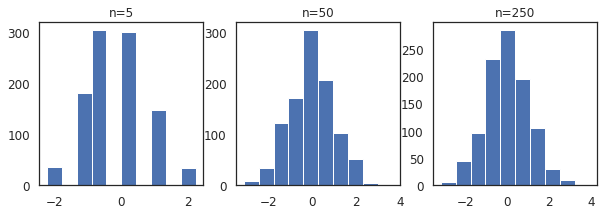

In [15]:
def drawZ(n, num_draws=1000):
    z = []
    for i in range(num_draws):
        x = np.random.binomial(1,0.5,size=n)
        x[x==0] = -1
        z.append(1/np.sqrt(n)*sum(x))
    return z

Z_5 = drawZ(5)
Z_50 = drawZ(50)
Z_250 = drawZ(250)

fig, axs = plt.subplots(1, 3, figsize=(10,3));
axs[0].hist(Z_5)
axs[0].set_title('n=5')
axs[1].hist(Z_50)
axs[1].set_title('n=50')
axs[2].hist(Z_250)
axs[2].set_title('n=250')


## Problem 3

In [18]:
num_samples = 25000
gd = np.random.normal(0,5,num_samples)
est_mean = gd.sum()/num_samples
est_var = (1.0/(num_samples-1))*(np.sum((gd - est_mean)**2))
est_std = np.sqrt(est_var)
print('mean: {}, std: {}'.format(est_mean, est_std))

mean: 0.027044107621129316, std: 5.004213729582196


## Problem 4

In [20]:
num_samples = 10000
mean = np.array([-5,5])
cov = np.matrix([[20, .8],[.8, 30]])
mvn = np.random.multivariate_normal(mean, cov, num_samples)
est_mean = mvn.sum(axis=0, keepdims=True)/num_samples
cent = mvn - est_mean
est_cov = (1.0/(num_samples-1))*np.dot(cent.T, cent)
print('mean: {} \n\n cov: {}'.format(est_mean, est_cov))

mean: [[-5.00566714  4.95008311]] 

 cov: [[19.98644789  0.83416623]
 [ 0.83416623 29.5013277 ]]


## Problem 5

In [21]:
if 'google.colab' in str(get_ipython()):
  df = pd.read_csv('https://raw.githubusercontent.com/cangokalp/EE-460J/master/lab_1/PatientData.csv', header=None, na_values='?')
else:
  df = pd.read_csv('PatientData.csv', header=None, na_values='?')

df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,NaN,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,NaN,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [22]:
df.dtypes.value_counts()

int64      155
float64    125
dtype: int64

In [24]:
# df=df.rename(columns = {279:'condition'})
# target_perc = pd.DataFrame(df.condition.value_counts())
# target_perc['Percentage'] = 100*df.condition/df.shape[0]
# target_perc

>a

In [25]:
print('number of patients: {}, number of features: {}'.format(df.shape[0],df.shape[1]))

number of patients: 452, number of features: 280


> b

In [26]:
df.describe(include=[np.number])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,condition
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,444.000000,430.000000,451.000000,76.000000,451.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,36.150901,48.913953,36.716186,-13.592105,74.463415,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,...,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,57.858255,29.346409,36.020725,127.220248,13.870684,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,...,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,-170.000000,-135.000000,-179.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,0.000000,0.0,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,14.000000,41.000000,12.000000,-124.500000,65.000000,0.000000,40.000000,0.000000,0.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.200000,-13.000000,0.000000,0.000000,0.000000,2.000000,-19.525000,9.850000,-0.500000,0.000000,7.875000,-9.100000,0.000000,0.000000,0.400000,1.100000,-0.925000,11.

In [27]:
df2 = df.iloc[:,[0,1,2,3,279]]
df2.sort_values(by=2, ascending=False)

,0,1,2,3,condition
141,1,1,780,6,5
316,0,0,608,10,5
0,75,0,190,80,8
4,75,0,190,80,7
448,37,0,190,85,10
...,...,...,...,...,...
401,9,0,120,25,14
379,8,0,120,28,10
424,7,0,119,21,9
60,1,0,110,10,5


It seems like for feature 2 - 780 and 608 was an input error - replace them by mean of the entries similar to those data points. 

In [28]:
weird_indices = df2[df2[2]>=500].index.values
df2.iloc[weird_indices,:]

,0,1,2,3,condition
141,1,1,780,6,5
316,0,0,608,10,5


In [29]:
df3 = df2[(df2[0]<5) & (df['condition']==5)]
df3 = df3.drop(weird_indices)
df3

,0,1,2,3,condition
60,1,0,110,10,5
320,3,0,105,12,5


In [30]:
df2.iloc[weird_indices,2] = df3[2].mean()
df2.sort_values(by=2, ascending=False)

,0,1,2,3,condition
0,75,0,190.0,80,8
4,75,0,190.0,80,7
448,37,0,190.0,85,10
332,42,0,188.0,91,16
346,20,0,186.0,66,10
...,...,...,...,...,...
424,7,0,119.0,21,9
60,1,0,110.0,10,5
316,0,0,107.5,10,5
141,1,1,107.5,6,5


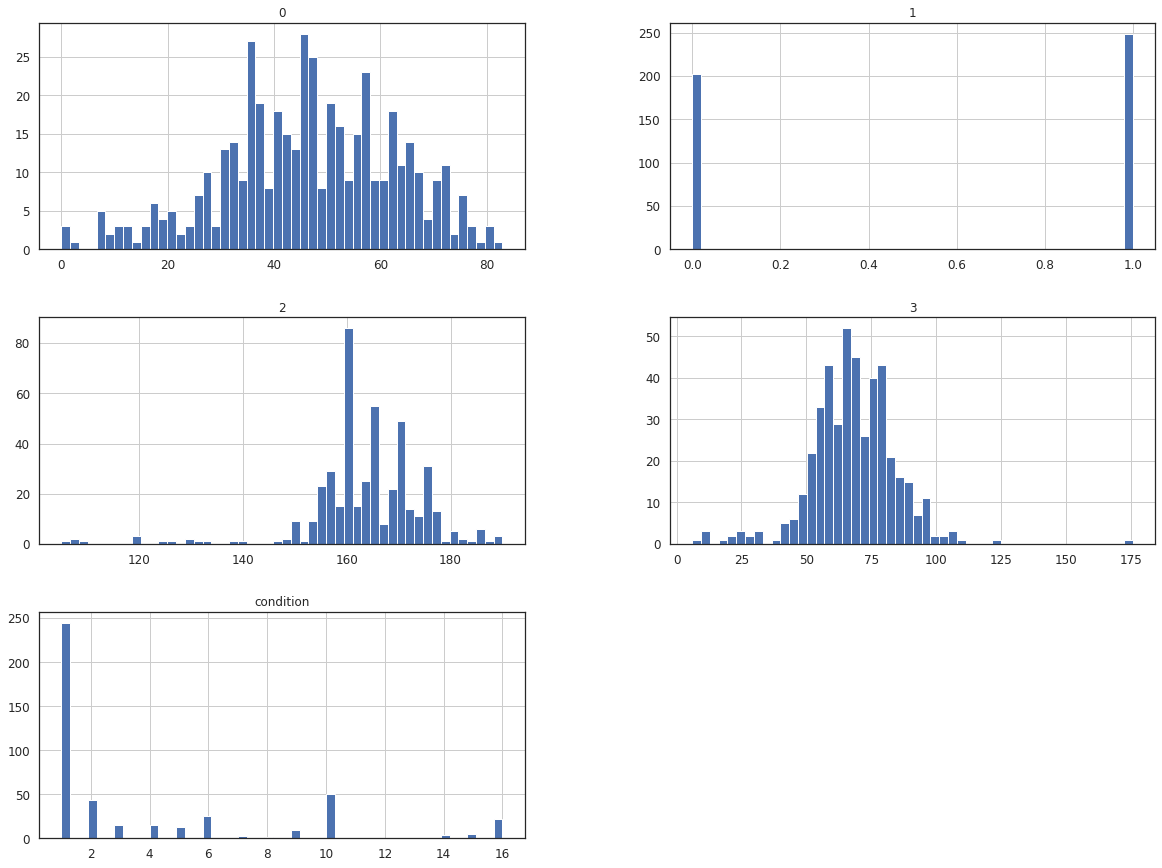

In [31]:
df2.hist(bins=50, figsize=(20,15));

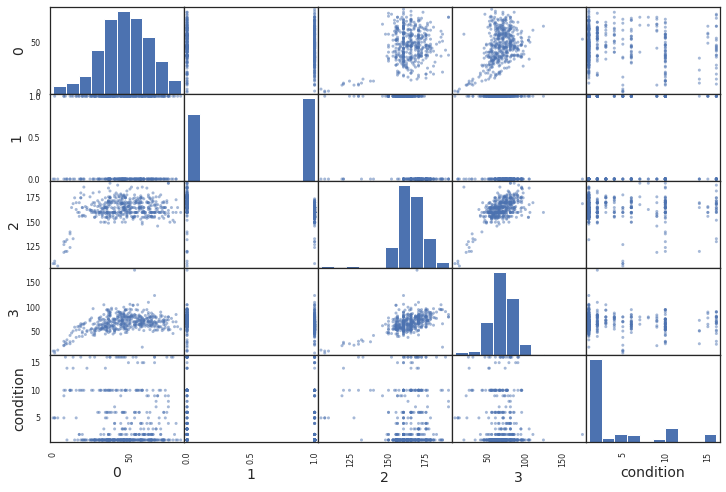

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2, figsize=(12, 8));

In [33]:
# sns.FacetGrid(df2, hue="condition", size=6).map(plt.hist, 0).add_legend()
# plt.title('0 vs condition')
# plt.show()
# df2[df2.condition==1][1].hist(bins=6)


0: age, 1: sex, 2:height in cm, 3: weight in kg

> c

In [34]:
print('number of n/a values: {}'.format(df.isnull().sum().sum()))
df.fillna(df.mean(), inplace=True)

number of n/a values: 408


In [35]:
print('(check) number of n/a values: {}'.format(df.isnull().sum().sum()))

(check) number of n/a values: 0


> d

Three most important features;

# Written Questions

## Problem 1

In [38]:
data = [[1/4.0, 1/4.0],[1/6.0, 1/3.0]]
df = pd.DataFrame(data, columns=['X=0','X=1'], index=['Y=0','Y=1'])
df

,X=0,X=1
Y=0,0.250000,0.250000
Y=1,0.166667,0.333333


In [45]:
print('a) prob X=1: {}'.format(df['X=1'].sum()))
print('b) prob X=1|Y=1: {}'.format(df.loc['Y=1', 'X=1']/df.sum(axis=1)['Y=1']))
mean_x = df['X=1'].sum()
var_x = df['X=0'].sum()*(0-mean_x)**2 + df['X=1'].sum()*(1-mean_x)**2
print('c) variance of X: {}'.format(var_x))
mean_x_cond = df.loc['Y=1','X=1']/df.sum(axis=1)['Y=1']
var_x_cond = df.loc['Y=1','X=0']/df.sum(axis=1)['Y=1']*(0-mean_x_cond)**2 + df.loc['Y=1','X=1']/df.sum(axis=1)['Y=1']*(1-mean_x_cond)**2
print('d) variance of X|Y=1: {}'.format(var_x_cond))
e_first_term = e_second_term = df.loc['Y=1','X=1']/df.sum(axis=1)['Y=1']
e_third_term = 3
print('e) {}'.format(e_first_term+e_second_term+e_third_term))

a) prob X=1: 0.5833333333333333
b) prob X=1|Y=1: 0.6666666666666666
c) variance of X: 0.24305555555555552
d) variance of X|Y=1: 0.2222222222222222
e) 4.333333333333333


## Problem 2

## Problem 3

In [46]:
print('tool: the normal approximation to binomial')
n = 100
p = 2/3.0
z = (50+0.5-n*p)/(np.sqrt(n*p*(1-p)))
import scipy.stats as st
print('prob of getting 50 or fewer heads: {}'.format(st.norm.cdf(z)))

tool: the normal approximation to binomial
prob of getting 50 or fewer heads: 0.00030238299493064023
